In [116]:
import os
HOME = os.getcwd()
print(HOME)

/home/miladsoleymani/Human_Car_detection/notebooks


In [117]:
!nvidia-smi

Fri Apr 14 08:52:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    29W /  70W |   4828MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [118]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt
!pip install setuptools==65.5.1
!pip install pytesseract

In [15]:
!git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/mftnakrsu/Automatic_Number_Plate_Recognition_YOLO_OCR

Cloning into 'Automatic_Number_Plate_Recognition_YOLO_OCR'...
remote: Enumerating objects: 569, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 569 (delta 40), reused 25 (delta 9), pack-reused 452
Receiving objects: 100% (569/569), 87.41 MiB | 47.92 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [21]:
import torch
 
# Model /home/miladsoleymani/Human_Car_detection/notebooks/yolov5
model = torch.hub.load(
    './yolov5', 
    'custom', 
    path='./Automatic_Number_Plate_Recognition_YOLO_OCR/model/last.pt', 
    source='local', 
)

YOLOv5 🚀 v7.0-140-g1db9533 Python-3.8.10 torch-2.0.0+cu117 CUDA:0 (Tesla T4, 14960MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [26]:
results = model("./imgs/image.png")

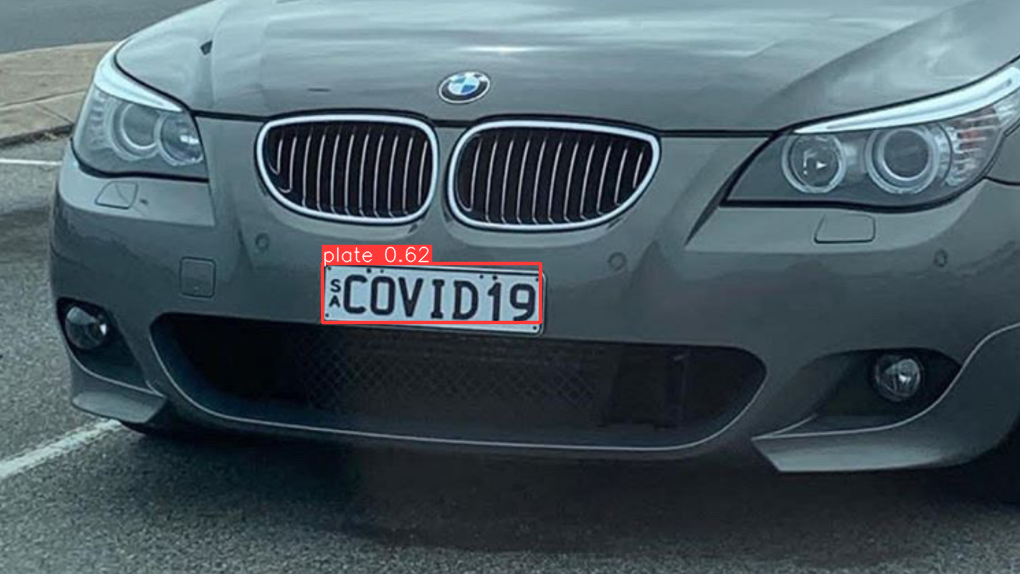

In [27]:
results.show()

In [54]:
x1, y1, x2, y2 = results.xyxy[0].cpu().numpy()[0][0:4] # first list, data idx, xyxy

width = x2 - x1
height = y2 - y1

x1, y1, x2, y2, width, height

(322.0338, 263.2535, 540.82794, 322.02887, 218.79413, 58.77536)

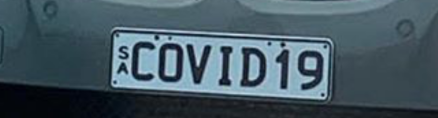

In [77]:
import cv2
import numpy as np
from PIL import Image

img = cv2.imread("./imgs/image.png")

cropped_image = img[int(y1 - (height / 2)):int(y2 + (height / 2)), int(x1 - (width / 2)):int(x2 + (width / 2))]

show_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
show_image = Image.fromarray(show_image)

show_image

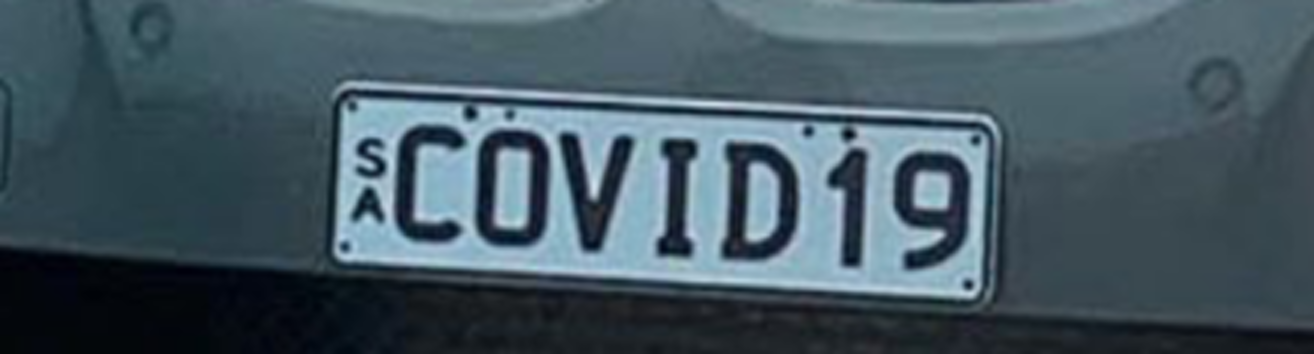

In [78]:
resized_image = cv2.resize(cropped_image, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

show_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
show_image = Image.fromarray(show_image)

show_image

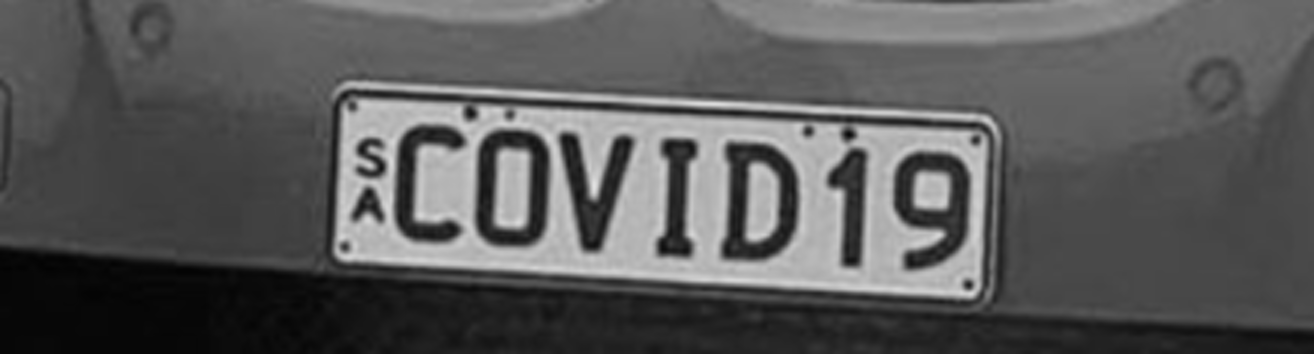

In [80]:
grayed_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)

show_image = cv2.cvtColor(grayed_image, cv2.COLOR_BGR2RGB)
show_image = Image.fromarray(show_image)

show_image

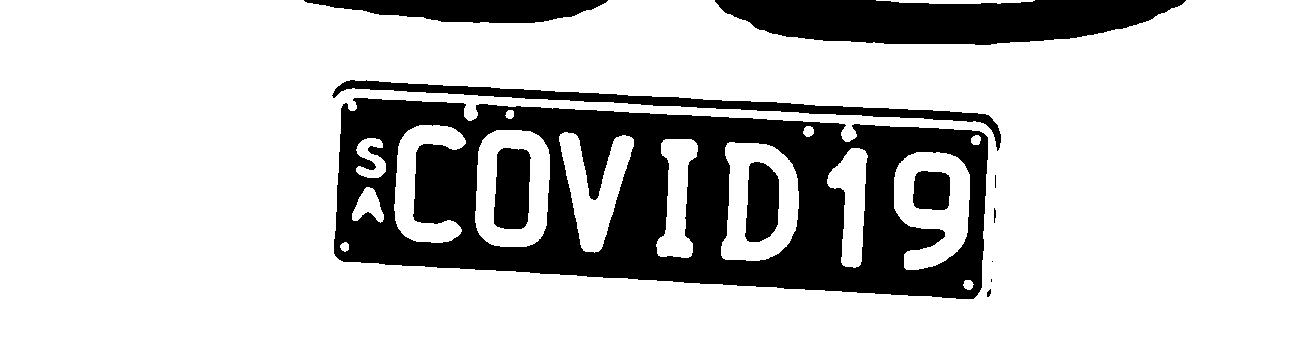

In [85]:
ret, thresh = cv2.threshold(grayed_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

show_image = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
show_image = Image.fromarray(show_image)

show_image

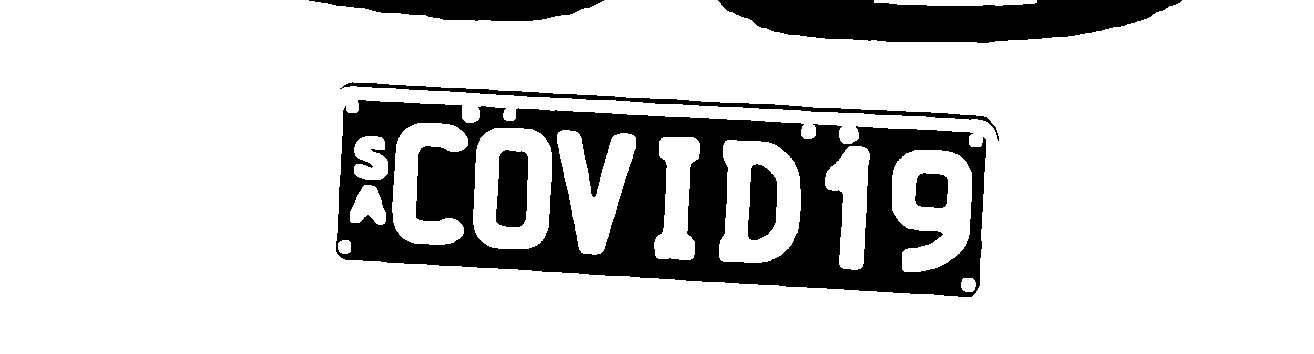

In [114]:
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dialation = cv2.dilate(thresh, rect_kern, iterations=1)

show_image = cv2.cvtColor(dialation, cv2.COLOR_BGR2RGB)
show_image = Image.fromarray(show_image)

show_image

In [115]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
result = reader.readtext(dialation)
result

[([[325, 97], [1000, 97], [1000, 303], [325, 303]],
  'EcOVID1g',
  0.5115881430992152)]

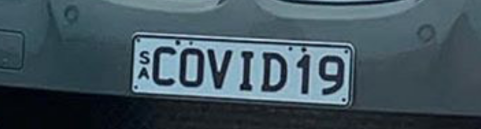

In [117]:
from PIL import Image

img = Image.open("./imgs/image.png")
img = img.convert("RGB")
percent = 0.1
area = (x1 - (percent*width), y1 - (percent*height), x2 + (percent*width), y2 + (percent*height))
cropped_img = img.crop(area)
cropped_img

In [120]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
result = reader.readtext(np.array(cropped_img))
result

[([[125, 29], [358, 29], [358, 107], [125, 107]],
  'IcoviDig',
  0.10673688150378134)]

In [ ]:
import easyocr
reader = easyocr.Reader(['en'], detect_network = 'dbnet18', gpu=False) # this needs to run only once to load the model into memory
result = reader.readtext(np.array(cropped_img))
result

Using CPU. Note: This module is much faster with a GPU.
